In [1]:
import glob
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
from scipy import stats
import seaborn as sns

import config_readwrite as crw
import plot_params as pp
pp.fonts()

LOCAL = False
if LOCAL is True:
    sys.path.append("/Users/sarahfong/tools/py_")
    name = "local_config.ini"
else:
    name = 
config, cfn = crw.read_config(name)

section="CRISPICK"
ENDOG = config[section]["endog"]
SINGLE_NULL = config[section]["single_null"]
RANDOM_NULLS = config[section]["random_nulls"]
RE = config[section]["results"]

if os.path.exists(RE) is False:
    os.mkdir(RE)

# Load data

In [2]:
def formatDf(file):
    
    # get file name
    filename=os.path.split(file)[1].split("-sgrna-designs.txt")[0]
    
    # open dataframe
    df = pd.read_csv(file, sep='\t',) 
    
    # add filename id
    df["id"] = filename
    
    # add region
    df['region'] = df["Input"].apply(lambda x: x.split("|")[1])
    
    return df, filename

## endogenous

In [3]:
df, fn = formatDf(ENDOG)

df.head()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,1,3,1.0,1.0,1,1,1,NaN,endog,chr22:42533418-42533618
1,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,6,2,1.0,1.0,2,2,1,NaN,endog,chr22:42533418-42533618
2,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,5,10,1.0,1.0,4,3,1,NaN,endog,chr22:42533418-42533618
3,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,8,8,1.0,1.0,5,4,1,NaN,endog,chr22:42533418-42533618
4,endog|chr22:42533418-42533618|nan,5,9606,NaN,NaN,endog|chr22:42533418-42533618|nan,CRISPRa,UNSTRUCTURED,endog|chr22:42533418-42533618|nan,NaN,...,11,7,1.0,1.0,10,5,1,NaN,endog,chr22:42533418-42533618


## single-null

In [4]:
sn, fn = formatDf(SINGLE_NULL)
sn.head()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank,Off-Target Rank,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region
0,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,6,2,1.0,1.0,1,1,1,NaN,single-null-0,chr22:42533418-42533618
1,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,5,3,1.0,1.0,2,2,1,NaN,single-null-0,chr22:42533418-42533618
2,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,2,6,1.0,1.0,3,3,1,NaN,single-null-0,chr22:42533418-42533618
3,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,9,1,1.0,1.0,4,4,1,NaN,single-null-0,chr22:42533418-42533618
4,single-null-0|chr22:42533418-42533618|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr22:42533418-42533618|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr22:42533418-42533618|TCGATCGC...,NaN,...,1,10,1.0,1.0,5,5,1,NaN,single-null-0,chr22:42533418-42533618


## random 10 nulls

In [ ]:
RNS = glob.glob(RANDOM_NULLS)

rn_collection={}
for file in RNS:
    test, fn = formatDf(file)
    rn_collection[fn] = test
    
    # concatenate all random nullomer predictions
rn = pd.concat(rn_collection.values())

print(rn.shape)
rn.head()

# parse off target 

# NEED TO INTERPRET CDF BIN 

In [141]:
off_target_cols = list(df)[23:34] # off target def? see https://portals.broadinstitute.org/gppx/crispick/public/how-it-works

In [146]:
off_annots = {
   # "# Off-Target Tier I Match Bin I Matches":"Tier I: TSS-relative region, protein-coding gene",
   # "# Off-Target Tier I Match Bin II Matches":"Tier II: TSS-relative region, non-coding gene",
    #"# Off-Target Tier I Match Bin III Matches":"Tier III: all regions not in Tier I-II", 
    "all":"summed off target"
    }

# sum all off target tiers together

In [142]:
rn["all"]= rn[off_target_cols].sum(axis=1) # nullomer df

df["all"]= df[off_target_cols].sum(axis=1) # endogenous df
off_target_cols.append("all")
df[off_target_cols]

,# Off-Target Tier I Match Bin I Matches,# Off-Target Tier II Match Bin I Matches,# Off-Target Tier III Match Bin I Matches,# Off-Target Tier I Match Bin II Matches,# Off-Target Tier II Match Bin II Matches,# Off-Target Tier III Match Bin II Matches,# Off-Target Tier I Match Bin III Matches,# Off-Target Tier II Match Bin III Matches,# Off-Target Tier III Match Bin III Matches,# Off-Target Tier I Match Bin IV Matches,# Off-Target Tier II Match Bin IV Matches,all
0,0,0,1,0,0,106,0,1,74,1,0,183
1,0,0,1,0,0,62,5,0,244,1,0,313
2,0,0,5,1,1,378,1,1,257,0,3,647
3,0,0,5,0,0,174,0,1,386,1,2,569
4,0,0,3,7,3,572,11,3,353,8,2,962
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,0,0,162,2,1,244,0,2,412
496,0,0,1,0,0,178,0,0,226,0,2,407
497,0,0,1,0,0,129,0,1,220,0,1,352
498,0,0,1,0,0,133,1,4,218,4,1,362


In [144]:
rn[off_target_cols]

,# Off-Target Tier I Match Bin I Matches,# Off-Target Tier II Match Bin I Matches,# Off-Target Tier III Match Bin I Matches,# Off-Target Tier I Match Bin II Matches,# Off-Target Tier II Match Bin II Matches,# Off-Target Tier III Match Bin II Matches,# Off-Target Tier I Match Bin III Matches,# Off-Target Tier II Match Bin III Matches,# Off-Target Tier III Match Bin III Matches,# Off-Target Tier I Match Bin IV Matches,# Off-Target Tier II Match Bin IV Matches,all
0,0,0,0,0,0,16,0,0,20,0,0,36
1,0,0,0,0,0,21,0,0,24,0,0,45
2,0,0,0,1,0,46,3,0,67,0,0,117
3,0,0,0,0,0,6,0,0,10,0,0,16
4,0,0,1,0,0,106,0,1,74,1,0,183
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,7,0,1,20,0,0,28
496,0,0,1,0,0,162,2,1,244,0,2,412
497,0,0,1,0,0,129,0,1,220,0,1,352
498,0,0,1,0,0,178,0,0,226,0,2,407


(1b) CRISPRa/i: Match Tiers ("Tiers I - III" in the output file):

    Tier I: TSS-relative region of a protein-coding gene
    Tier II: TSS-relative region of a non-coding gene
    Tier III: all regions not in Tier I-II


2) CFD scores ("Match Bins I - IV" in the output file):

        Match Bin I: CFD = 1.0
        Match Bin II: 0.2 ≤ CFD < 1.0
        Match Bin III: 0.05 ≤ CFD < 0.2
        Match Bin IV: CFD < 0.05


   - Off-Target Cutting Frequency Determination (CFD) Score Calculation from https://portals.broadinstitute.org/gppx/crispick/public/how-it-works

       - The Cutting Frequency Determination (CFD) score is calculated by using the percent activity values provided in a matrix of penalties based on mismatches of each possible type at each position within the guide RNA sequence. This matrix will become available pending publication with a full description of it.

        - For example, if the interaction between the sgRNA and DNA has a single rG:dA ("rna G aligning with dna A") mismatch in position 6, then that interaction receives a score of 0.67. If there are two or more mismatches, then individual mismatch values are multiplied together. For example, an rG:dA mismatch at position 7 coupled with an rC:dT mismatch at position 10 receives a CFD score of 0.57 x 0.87 = 0.50.


# off target scores

[Text(0.5, 1.0, 'Crispick off-target'),
 (-1.0, 1000.0),
 (0.0, 1.05),
 Text(0.5, 0, 'total off-target sites, N')]

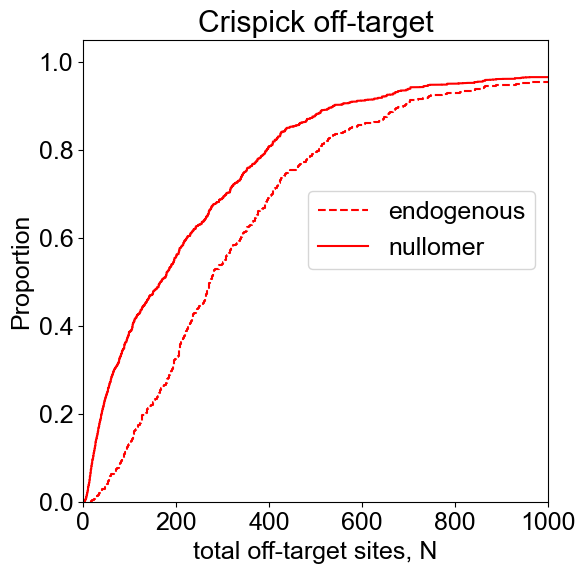

In [163]:
fig, ax= plt.subplots(figsize=(6,6))
color = ["r", "g", 'b', "orange"]
n = 0
for key, value in off_annots.items():
    sns.ecdfplot(df[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 linestyle="--"
                #common_norm=False,
                #binwidth=1
                )
    """
    sns.ecdfplot(sn[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 #linestyle="--"
                #common_norm=False,
                #binwidth=1
                )
    """
    sns.ecdfplot(rn[key], label=value, 
                 stat="proportion",
                 color = color[n],
                 linestyle="-"
                #common_norm=False,
                #binwidth=1
                )
    n+=1
    
ax.legend(["endogenous", "nullomer"], bbox_to_anchor=(1,0.7))
ax.set(title="Crispick off-target", 
      xlim=(-1,1000),
      ylim=(0, 1.05),
       xlabel = "total off-target sites, N"
       
      )
out = os.path.join(RE, "crispick.offtarget.all.pdf") 
plt.savefig(out, bbox_inches="tight")

# on target efficiency

<Axes: xlabel='On-Target Efficacy Score', ylabel='Percent'>

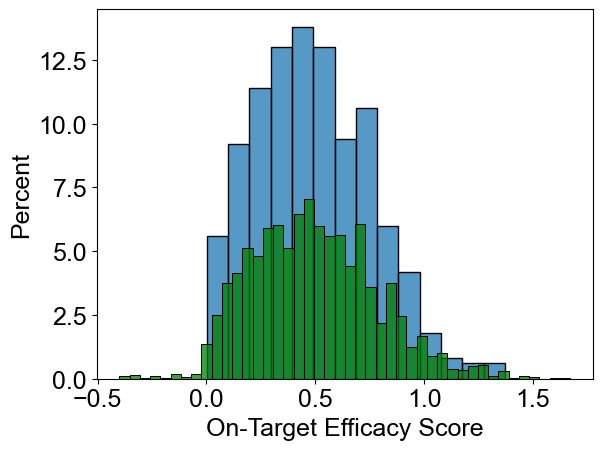

In [156]:
sns.histplot(df["On-Target Efficacy Score"],
              stat="percent",
             common_norm=False)
sns.histplot(rn["On-Target Efficacy Score"], color = "green", 
             stat="percent",
             common_norm=False,)

<Axes: xlabel='On-Target Efficacy Score', ylabel='Percent'>

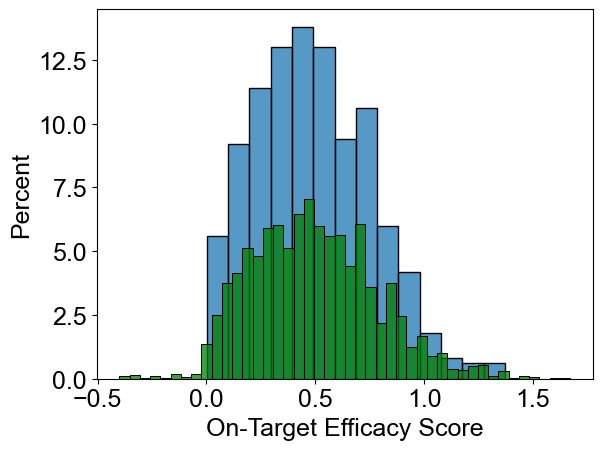

In [157]:
sns.histplot(df["On-Target Efficacy Score"],
              stat="percent",
             common_norm=False)
sns.histplot(rn["On-Target Efficacy Score"], color = "green", 
             stat="percent",
             common_norm=False,)

# per region off target

AttributeError: module 'matplotlib.pyplot' has no attribute 'cmap'

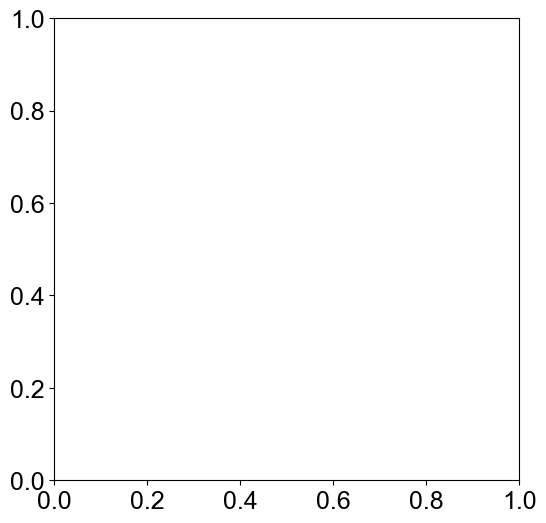

In [162]:
rcount = 0
for region in df.region.unique():

    # subset by region
    endog_region=df.loc[df["region"]==region]
    rn_region = rn.loc[rn["region"]==region].sort_values(by=[y], ascending=False)[:5] # choose top 5 nullomers to go with endog 
    #rn.loc[rn["region"]==region]

    color = ["r", "g", 'b', "orange"]
    
    fig, ax= plt.subplots(figsize=(6,6))
    
    # per tier of off target
    for n, key in enumerate(off_target_cols[:-1]):
        sns.ecdfplot(endog_region[key], label=key, 
                     stat="proportion",
                     color = plt.cmap.tab20.colors[n],
                     linestyle="--"
                    #common_norm=False,
                    #binwidth=1
                    )
        sns.ecdfplot(rn_region[key], label=key, 
                     stat="proportion",
                     color = color[n],
                     linestyle="-"
                    #common_norm=False,
                    #binwidth=1
                    )


    ax.legend(bbox_to_anchor=(1,0.7))
    ax.set(title=f"Crispick off-target\n{region}", 
          xlim=(-1,10),
          ylim=(0, 1.05)

          )
    out = os.path.join(RE, f"crispick-a.offtarget.{region}.pdf")
    plt.savefig(out, bbox_inches='tight')
    plt.show()
    plt.close()
    rcount +=1
    if rcount>10:
        break



In [161]:
n

4

In [132]:
non_coding_

KeyError: "None of [Index(['Tier I: TSS-relative region, protein-coding gene',\n       'Tier II: TSS-relative region, non-coding gene',\n       'Tier III: all regions not in Tier I-II', 'summed off target'],\n      dtype='object')] are in the [columns]"

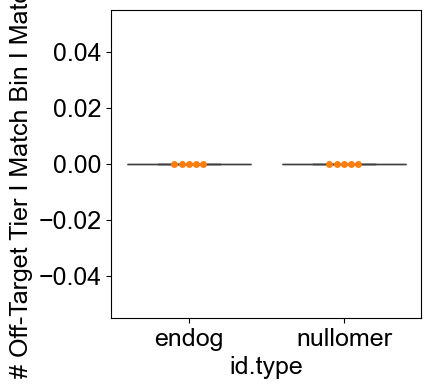

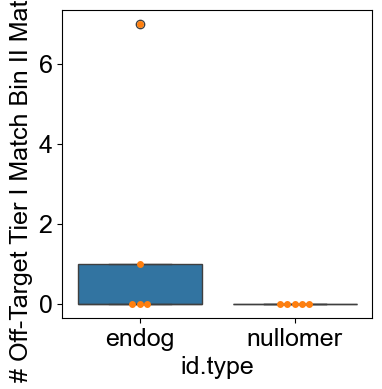

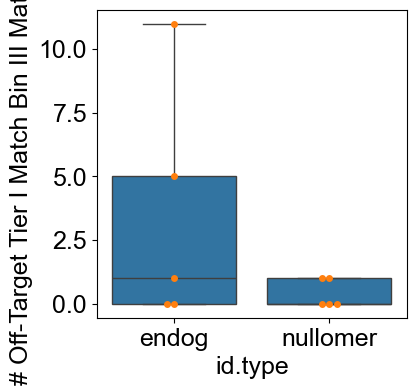

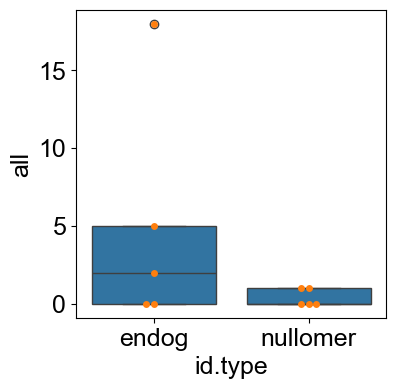

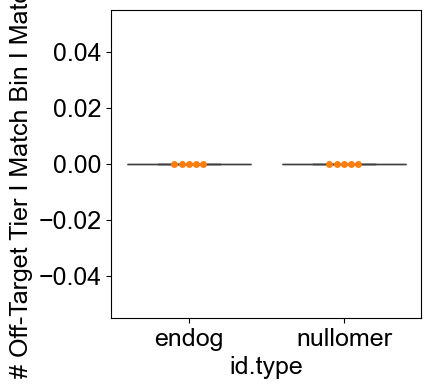

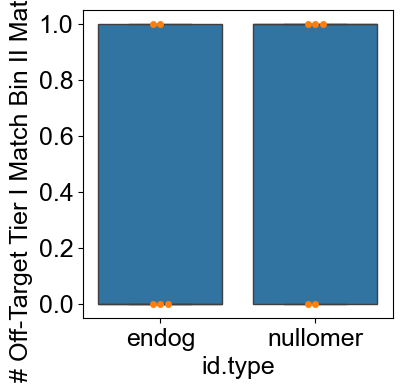

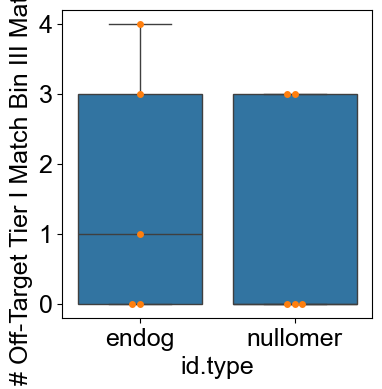

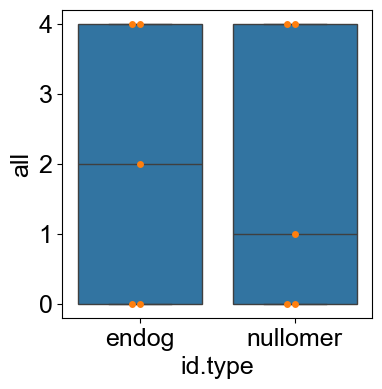

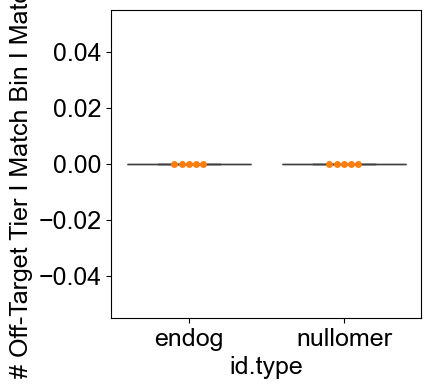

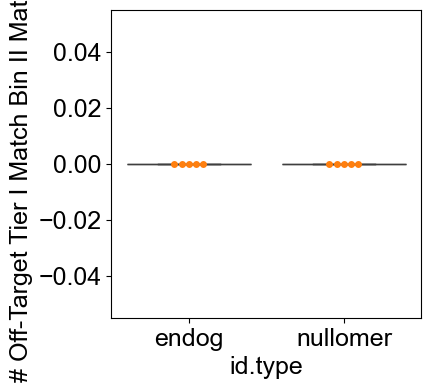

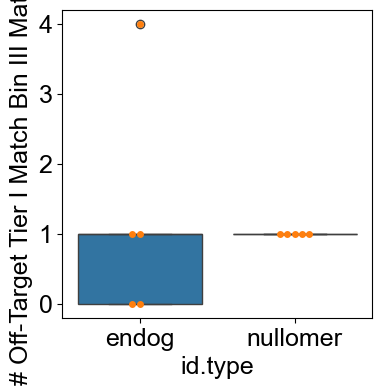

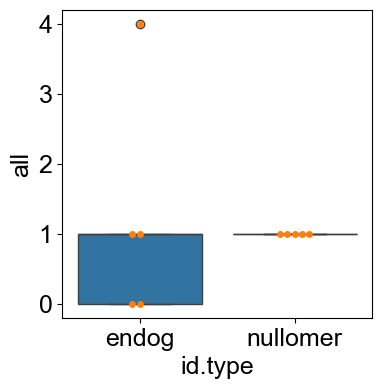

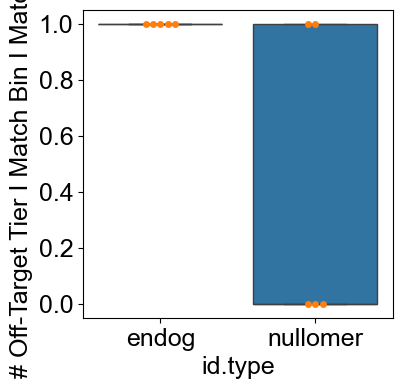

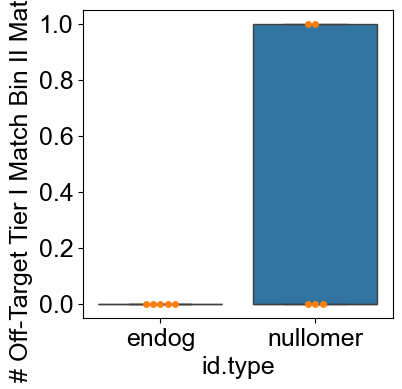

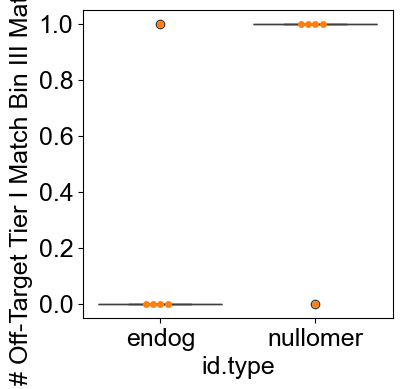

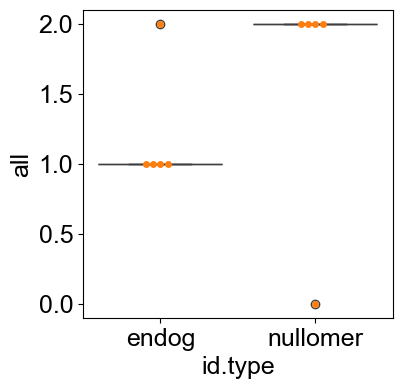

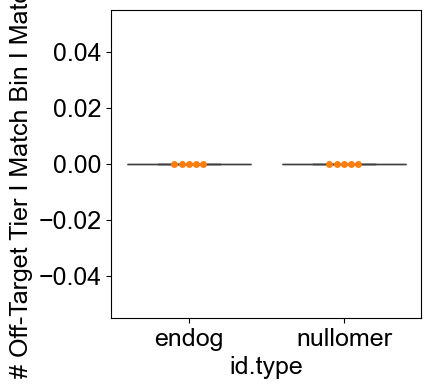

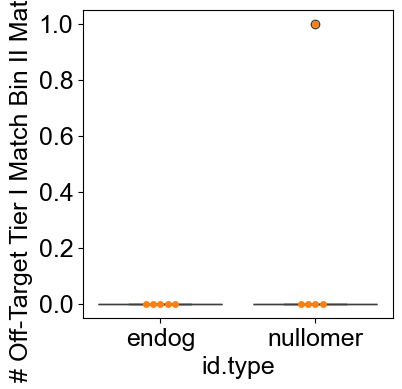

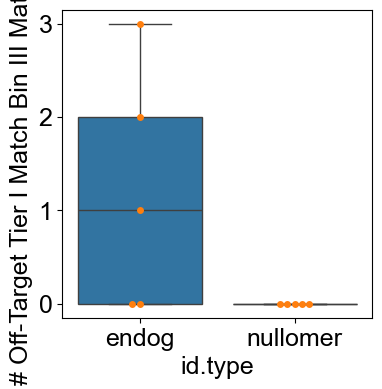

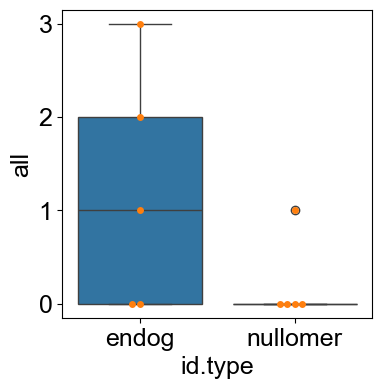

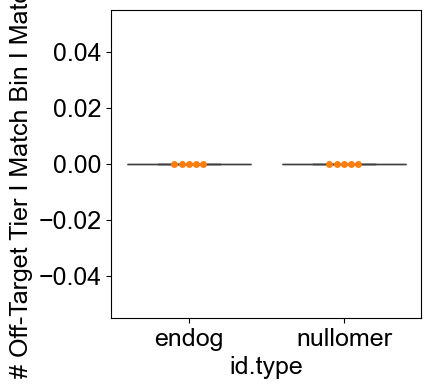

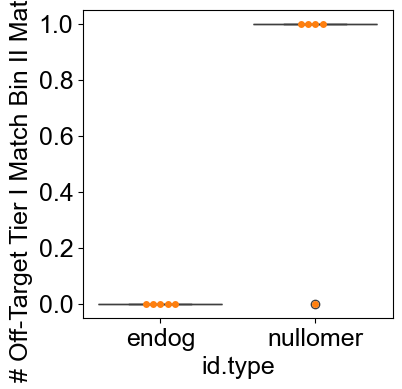

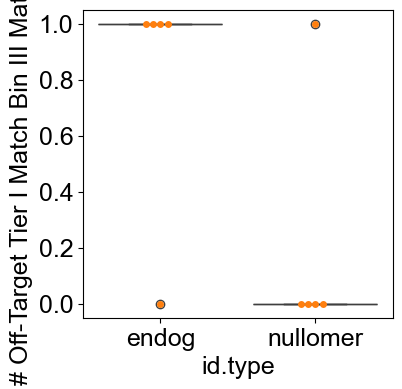

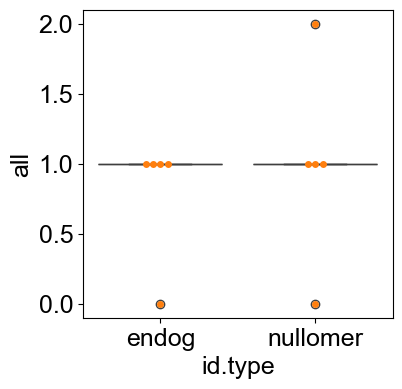

In [126]:
rcount = 0
for region in df.region.unique():

    # subset by region
    endog_region=df.loc[df["region"]==region]
    
    rn_region = rn.loc[rn["region"]==region].sort_values(by=["On-Target Efficacy Score"], ascending=False)[:5] # choose top 5 nullomers to go with endog 
    

    color = ["r", "g", 'b', "orange"]
    n = 0
    
    # per tier of off target
    for key, value in off_annots.items():
        x="id.type"
        y=key
        c = pd.concat([endog_region, rn_region])  # combine results 
        data=c

        # plot data
        fig, ax =plt.subplots(figsize=(4,4))
    
        sns.boxplot(x=x,y=y, data=data)
        sns.swarmplot(x=x,y=y, data=data)

        n+=1
    """
    ax.legend(bbox_to_anchor=(1,0.7))
    ax.set(title=f"Crispick off-target\n{region}", 
          xlim=(-1,10),
          ylim=(0, 1.05)

          )
    
    out = os.path.join(RE, f"crispick-a.offtarget.{region}.pdf")
    plt.savefig(out, bbox_inches='tight')
    """
    plt.show()
    plt.close()
    rcount +=1
    if rcount>5:
        break



chr22:42533418-42533618
chr17:81472134-81472334
chr1:23562395-23562595
chr10:68901084-68901284
chr1:150977355-150977555
chr3:48664048-48664248


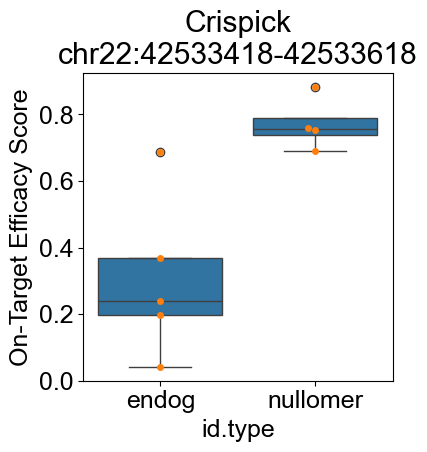

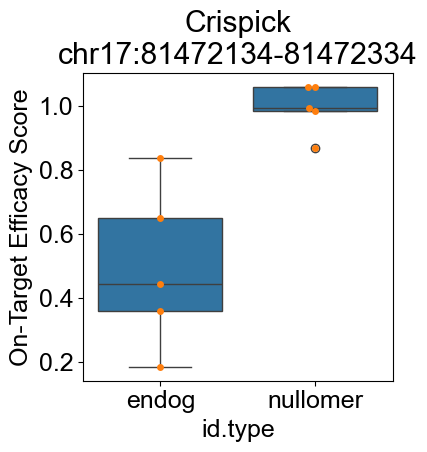

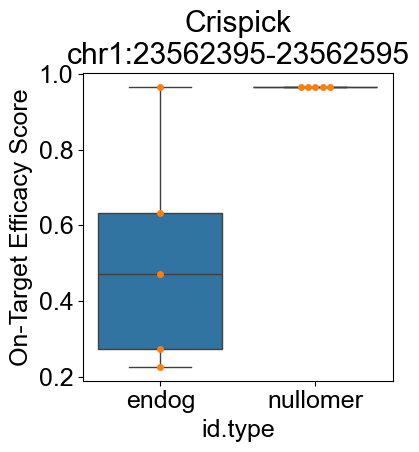

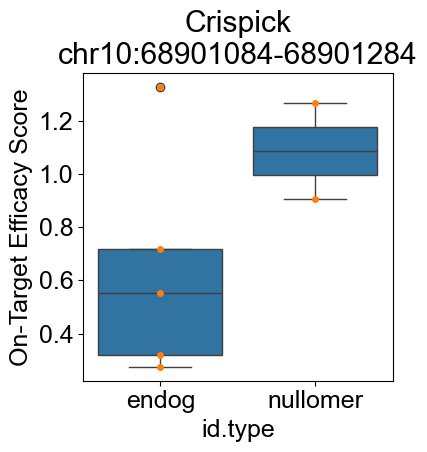

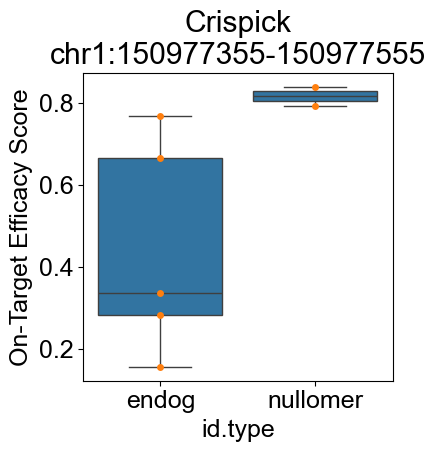

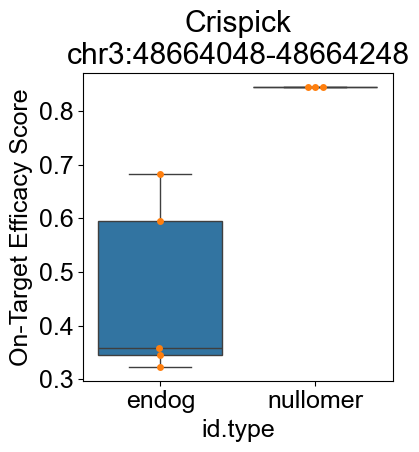

In [120]:
for n, region in enumerate(df.region.unique()):
    print(region)

    rn['id.type'] = "nullomer"
    df['id.type'] = "endog"

    x="id.type"
    y="On-Target Efficacy Score"
    
    endog_region=df.loc[df["region"]==region]
    rn_region = rn.loc[rn["region"]==region].sort_values(by=[y], ascending=False)[:5] # choose top 5 nullomers to go with endog
    if rn_region.loc[~rn_region["sgRNA 'Cut' Position"].isin(endog_region["sgRNA 'Cut' Position"])].shape[0]>0:

        # remove redundant nominations from endogenous sequence. 
        rn_region = rn_region.loc[~rn_region["sgRNA 'Cut' Position"].isin(endog_region["sgRNA 'Cut' Position"])]
    
    
    c = pd.concat([endog_region, rn_region])  # combine results 
    data=c

    # plot data
    fig, ax =plt.subplots(figsize=(4,4))
    
    sns.boxplot(x=x,y=y,data=data)
    sns.swarmplot(x=x,y=y,data=data)
    #stat_region, p_region = stats.mannwhitneyu()
    ax.set(title=f"Crispick\n{region}")
    if n ==5:
        break

# test all predictions

In [67]:
 all = pd.concat([df, rn])

[Text(0.5, 0, '100 endogenous + 5000 nullomers')]

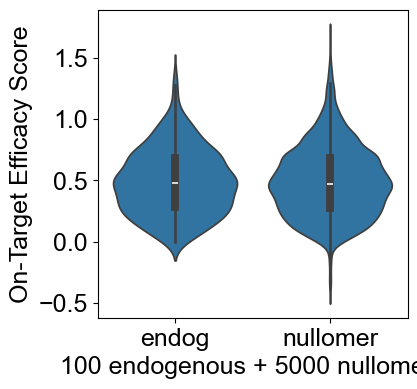

In [68]:
fig, ax =plt.subplots(figsize=(4,4))
x="id.type"
y="On-Target Efficacy Score"
data=all
sns.violinplot(x=x,y=y,data=data)
ax.set(xlabel="100 endogenous + 5000 nullomers")

In [86]:
stat_all, p_all = stats.ttest_ind(all.loc[all[x]=="endog", y], 
                                     all.loc[all[x]=="nullomer", y], 
                                    )
stat_all, p_all

(-0.29326264204869273, 0.7693324744392283)

In [90]:
rn_region.drop_duplicates()

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,On-Target Rank Weight,Off-Target Rank Weight,Combined Rank,Pick Order,Picking Round,Picking Notes,id,region,all,id.type
50,single-null-81|chr13:50124374-50124574|GAGGTAT...,5,9606,NaN,NaN,single-null-81|chr13:50124374-50124574|GAGGTAT...,CRISPRa,UNSTRUCTURED,single-null-81|chr13:50124374-50124574|GAGGTAT...,NaN,...,1.0,1.0,1,1,1,NaN,single-null-81,chr13:50124374-50124574,0,nullomer
50,single-null-0|chr13:50124374-50124574|TCGATCGC...,5,9606,NaN,NaN,single-null-0|chr13:50124374-50124574|TCGATCGC...,CRISPRa,UNSTRUCTURED,single-null-0|chr13:50124374-50124574|TCGATCGC...,NaN,...,1.0,1.0,1,1,1,NaN,single-null-0,chr13:50124374-50124574,4,nullomer
50,single-null-997|chr13:50124374-50124574|CGATTA...,5,9606,NaN,NaN,single-null-997|chr13:50124374-50124574|CGATTA...,CRISPRa,UNSTRUCTURED,single-null-997|chr13:50124374-50124574|CGATTA...,NaN,...,1.0,1.0,1,1,1,NaN,single-null-997,chr13:50124374-50124574,4,nullomer
52,single-null-482|chr13:50124374-50124574|ATCGCT...,5,9606,NaN,NaN,single-null-482|chr13:50124374-50124574|ATCGCT...,CRISPRa,UNSTRUCTURED,single-null-482|chr13:50124374-50124574|ATCGCT...,NaN,...,1.0,1.0,3,3,1,NaN,single-null-482,chr13:50124374-50124574,4,nullomer
50,single-null-781|chr13:50124374-50124574|CGTATC...,5,9606,NaN,NaN,single-null-781|chr13:50124374-50124574|CGTATC...,CRISPRa,UNSTRUCTURED,single-null-781|chr13:50124374-50124574|CGTATC...,NaN,...,1.0,1.0,1,1,1,NaN,single-null-781,chr13:50124374-50124574,4,nullomer


In [87]:
rn_region.sort_values(by=[y], ascending = False)[:5][y]

50    0.9713
50    0.9029
50    0.9029
52    0.9029
50    0.9029
Name: On-Target Efficacy Score, dtype: float64

In [88]:
endog_region.sort_values(by=[y], ascending = False)[y]

50    0.90290
51    0.71580
54    0.46450
52    0.33370
53    0.06035
Name: On-Target Efficacy Score, dtype: float64

In [94]:
rn.loc[rn['id']=="single-null-0"][y]

0      0.2782
1      0.2882
2      0.6370
3      0.1706
4      0.6864
        ...  
495    0.8729
496    0.3314
497    0.6038
498    0.1483
499    0.1752
Name: On-Target Efficacy Score, Length: 500, dtype: float64

In [104]:
set(rn_region["sgRNA 'Cut' Position"]), set(endog_region["sgRNA 'Cut' Position"])

({17, 51, 77, 80, 81, 82, 91, 92, 96, 99, 101, 102, 110, 111},
 {51, 81, 91, 111})